In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
with open("B:/Data/0210/Geophones/2025_0210_acq0001_bidir_inversion.pkl",'rb') as file:
    data = pickle.load(file)

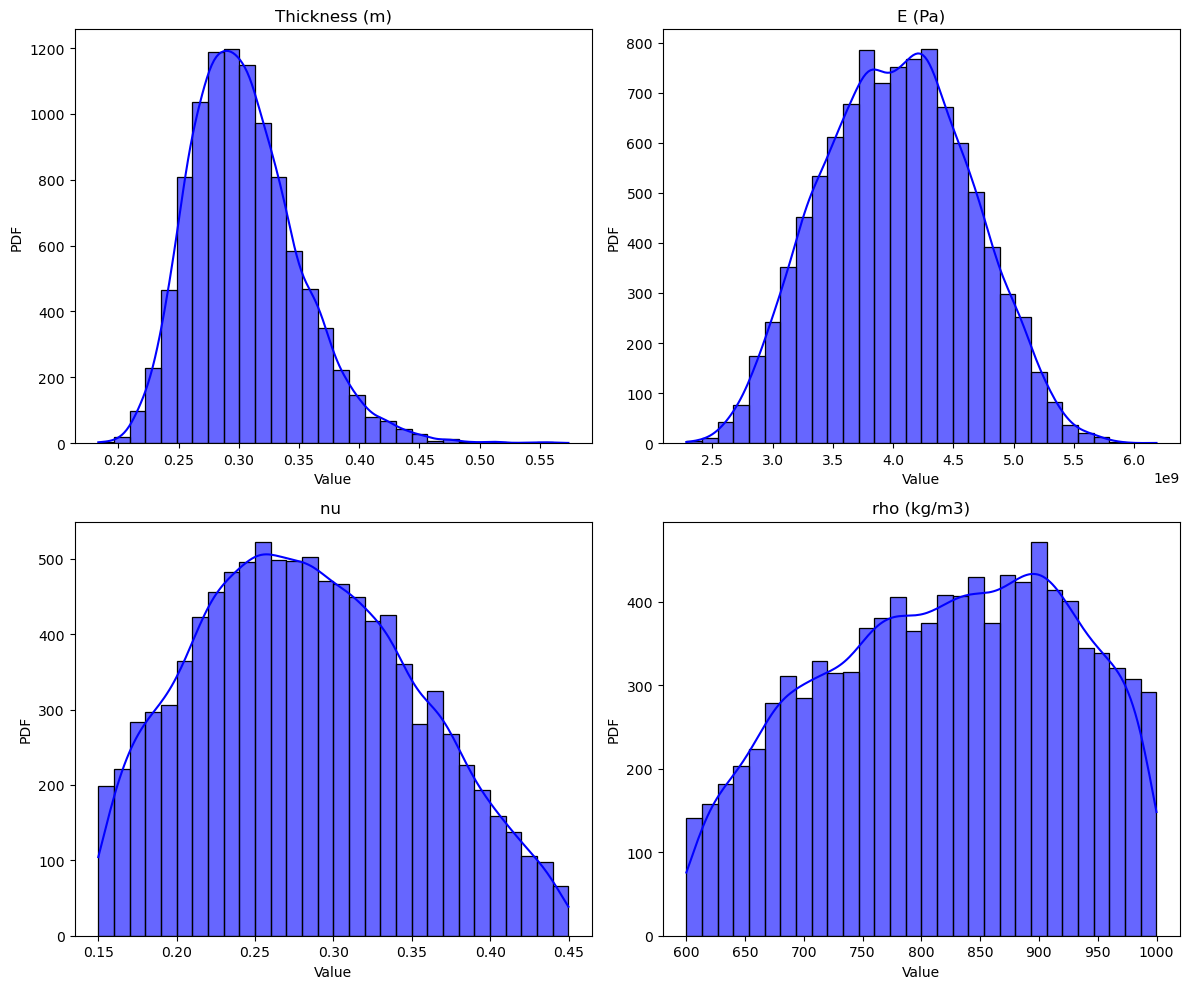

In [11]:


T_critic = data[0]
X = data[1]
misfit_accepted = data[2]

nonzeroidx = np.nonzero(X[0, :])[0][-1]

data_to_plot = [X[i, :nonzeroidx] for i in range(4)]

# Step 3: Create a 2x2 subplot and plot histograms with KDE
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

titles = ['Thickness (m)', 'E (Pa)',
          'nu ', 'rho (kg/m3)']

for i, ax in enumerate(axes.flat):
    data = data_to_plot[i]
    
    # Plot the histogram
    sns.histplot(data, bins=30, kde=True, ax=ax, edgecolor='black', color='blue', alpha=0.6)

    # Set titles and labels
    ax.set_title(titles[i])
    ax.set_xlabel('Value')
    ax.set_ylabel('PDF')

plt.tight_layout()
plt.show()


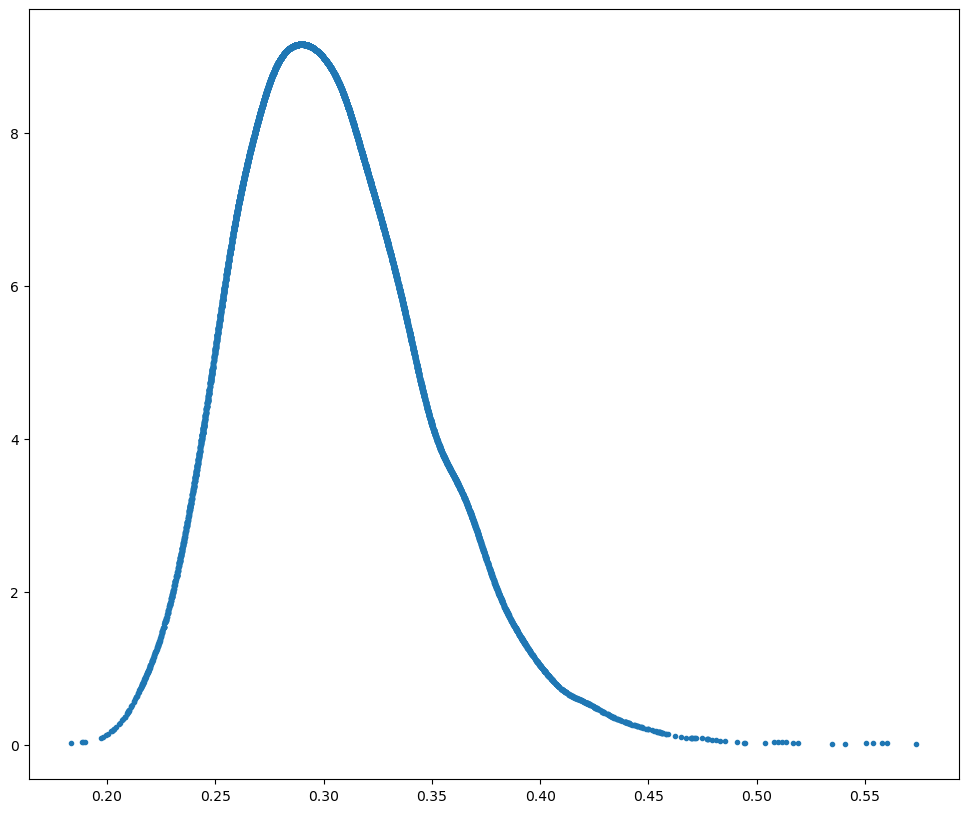

In [12]:
#%% Try to find maximum of gaussian kde
from scipy import stats


kde = stats.gaussian_kde(data_to_plot[0])
Y = kde.evaluate(data_to_plot[0])

# compute argmax
test = np.argmax(Y)



fig, ax = plt.subplots(figsize = (12,10))
ax.plot(data_to_plot[0],Y,'.')